<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Exercício Avalitivo de Filtragem Espacial

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


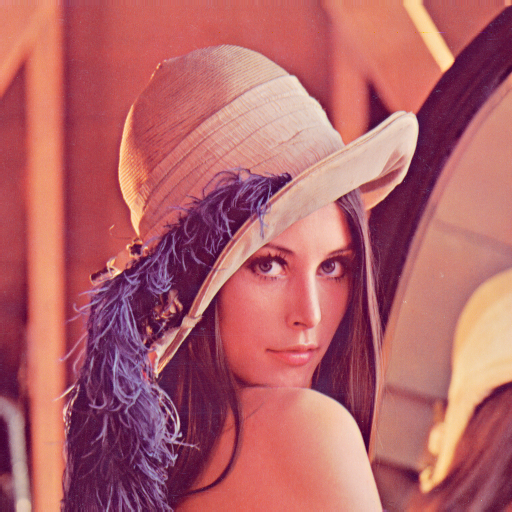

In [21]:
#abria a imagem
img = cv2.imread('./sample_data/lenna.png', 1)
cv2_imshow(img)

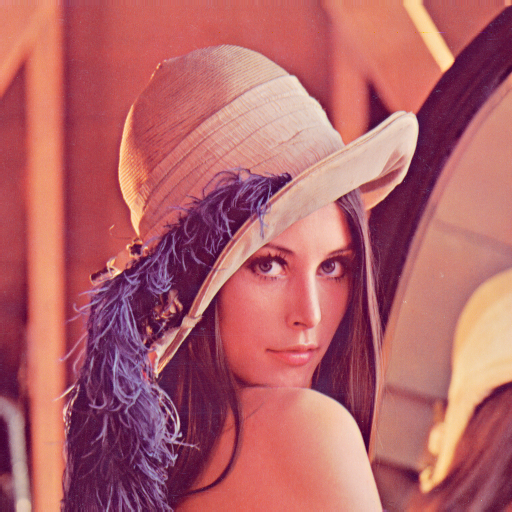

In [22]:
#mostrando a imagem colorida
cv2_imshow(img)

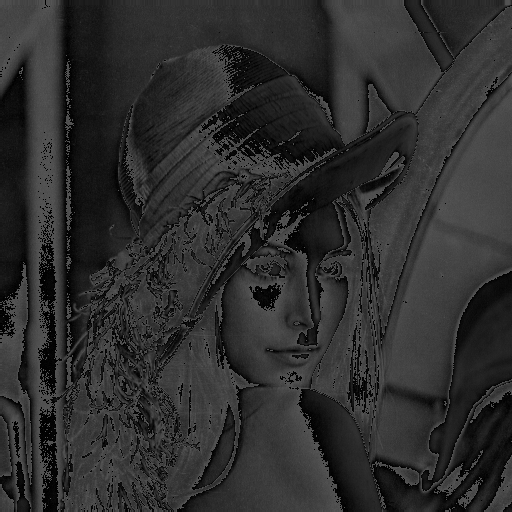

In [23]:
#aplicando conversão básica
#numpy
img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B+G+R)/3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2_imshow(img_grayscale_basic)

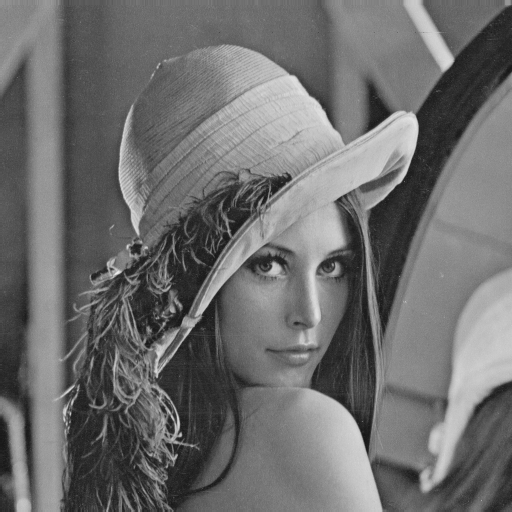

In [24]:
#aplicando conversão ponderada
img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2_imshow(img_grayscale_pondered)

## Filtro Espacial


In [25]:
def gauss_create(sigma=1, size_x=3, size_y=3):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))

    return exp*calc



### Suavização

1. Implemente a sua própria convolução manualmente, em formato de função, utilizando os conceitos vistos em aula
2. Aplique a filtragem de suavização, com as máscaras 3x3, 5x5 e 7x7, com os filtros:
 - média
 - gaussino (escolha uma distribuição adequada, podendo utilizar a função acima ou recuperando a distribuição usada na OpenCV)
 - mediana
3. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255.

In [26]:
def add_padding(img, padding_height, padding_width):
    n, m = img.shape

    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img

    return padded_img

In [27]:
def conv2d(img, kernel, padding=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width

    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width

    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  # Atribui valor à variável output

    # Perform convolution
    for i_img in range(img_height):  # Loop usando i
        for j_img in range(img_width):  # Loop usando j
            for i_kernel in range(k_height):
                for j_kernel in range(k_width):
                    output[i_img, j_img] = output[i_img, j_img] + (padded_img[i_img+i_kernel, j_img+j_kernel] * kernel[i_kernel, j_kernel])  # Atribui valor à variável output[i, j]
            output[i_img, j_img] = int(output[i_img, j_img])

    return np.array(output, dtype=np.uint8)

3x3


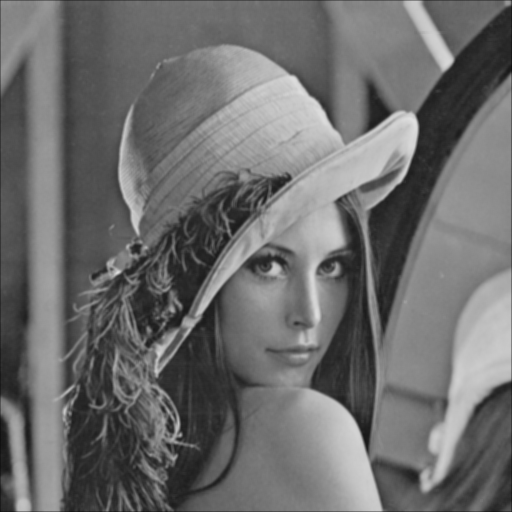

5x5


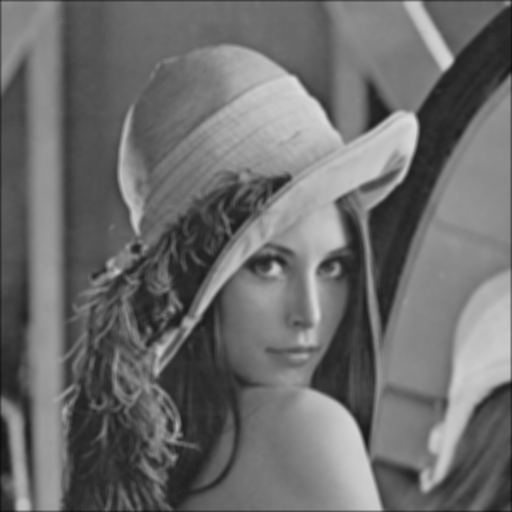

7x7


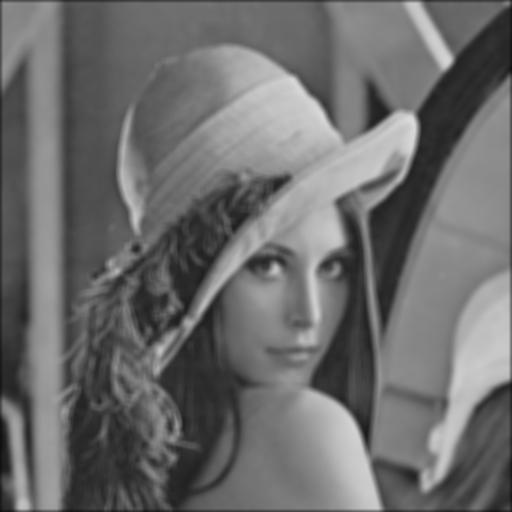

In [28]:
mean_3x3 = np.ones((3, 3))/9
mean_5x5 = np.ones((5, 5))/25
mean_7x7 = np.ones((7, 7))/49

print("3x3")
img_mean = conv2d(img_grayscale_pondered, mean_3x3)
conv_opencv = cv2.filter2D(src=img_grayscale_pondered, ddepth=-1, kernel=mean_3x3)
cv2_imshow(img_mean)

print("5x5")
img_mean2 = conv2d(img_grayscale_pondered, mean_5x5)
cv2_imshow(img_mean2)

print("7x7")
img_mean3 = conv2d(img_grayscale_pondered, mean_7x7)
cv2_imshow(img_mean3)

### Sharpening

4. Implemente os filtros de sharpening, utilizando as diferentes mascarás apresentadas no livro de referência da disciplina:
 - Laplaciano (figura 3.37)
 - Sharpening implementado na figura 3.38
 - Unsharp Masking e Highboost Filtering
 - Implemente os detectores de borda Laplaciano, Roberts e Sobel
 - Utilize a função Canny da OpenCV na mesma imagem usando nos outros detectores

5. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos
6. Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?
7. Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
Laplacian image with scaling 128


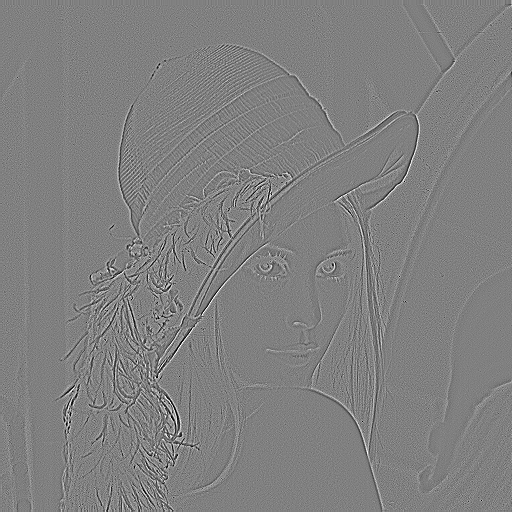

Sharpened image using Laplacian:


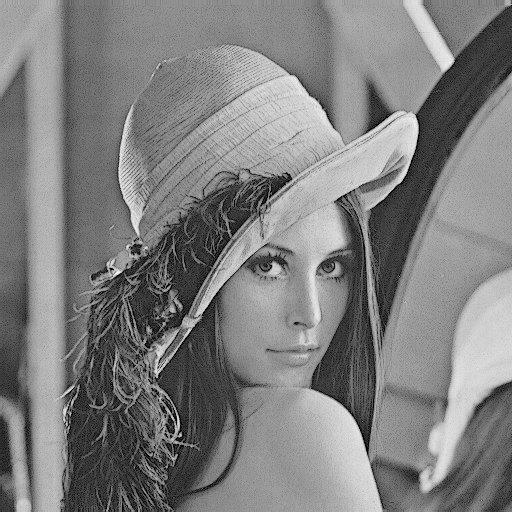

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
Laplacian image with scaling 0


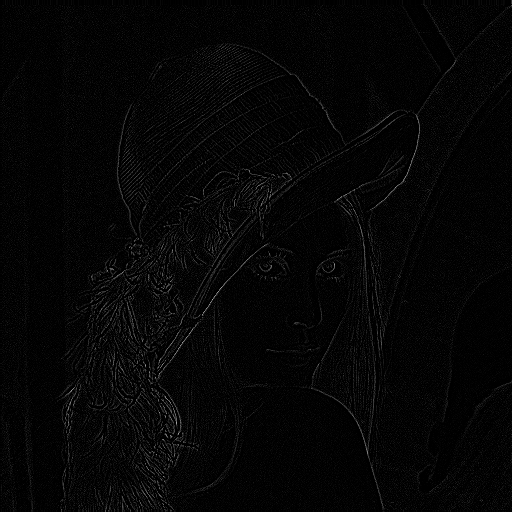

Sharpened image using Laplacian:


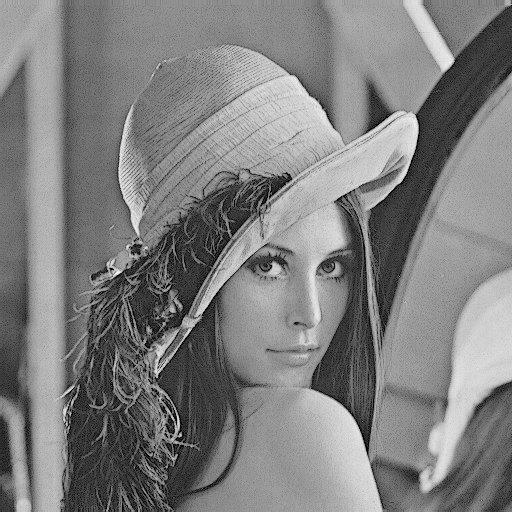

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
Laplacian image with scaling 128


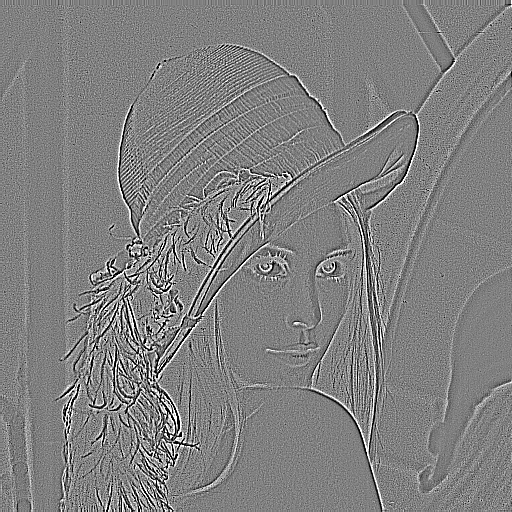

Sharpened image using Laplacian:


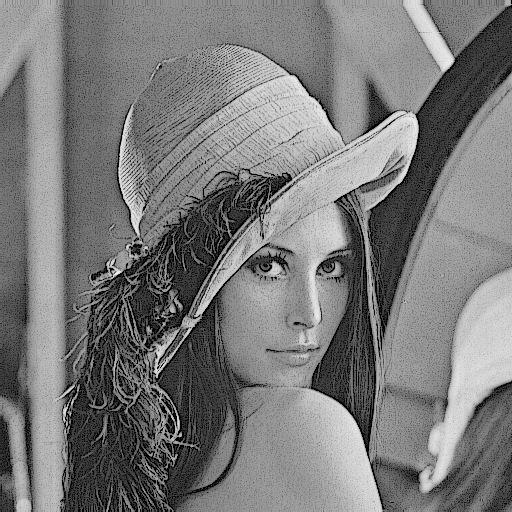

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
Laplacian image with scaling 0


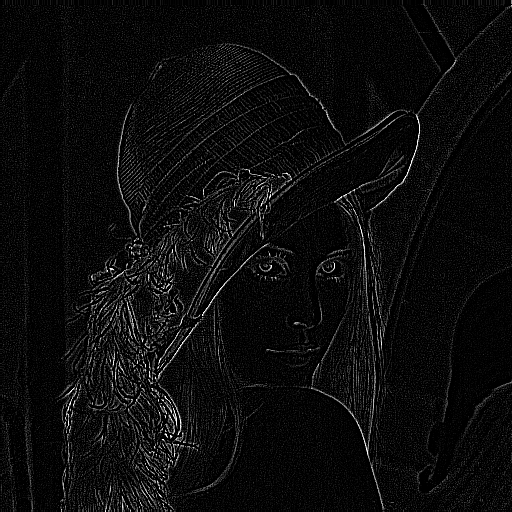

Sharpened image using Laplacian:


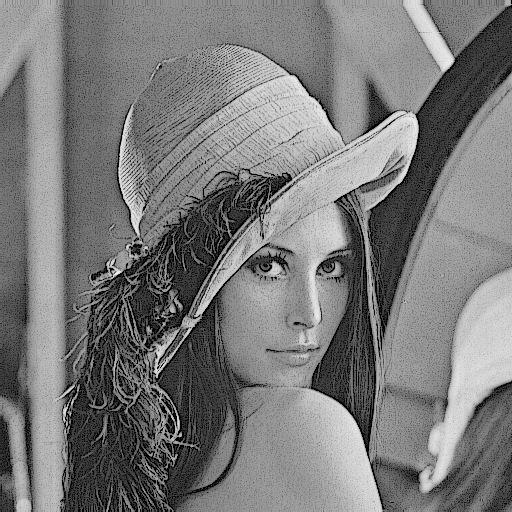

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
Laplacian image with scaling 128


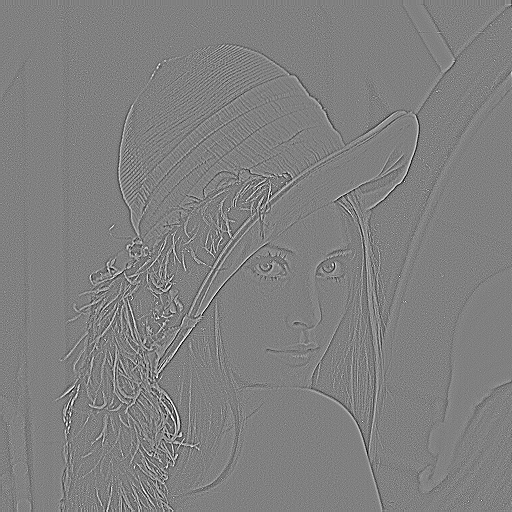

Sharpened image using Laplacian:


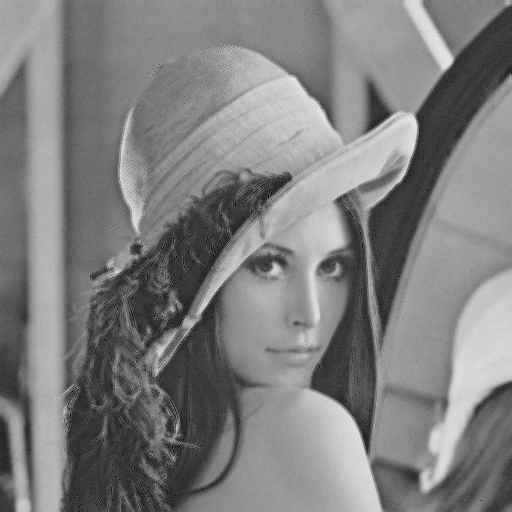

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
Laplacian image with scaling 0


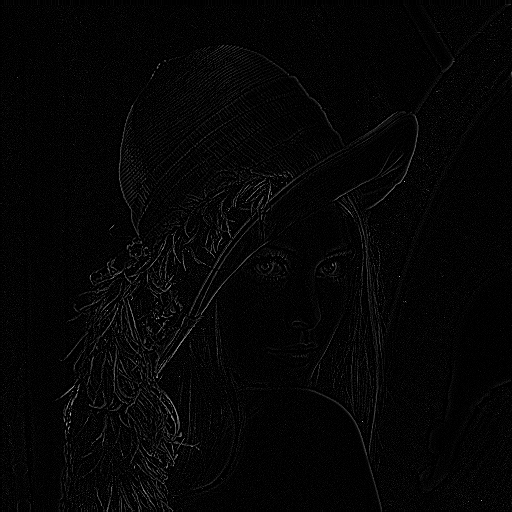

Sharpened image using Laplacian:


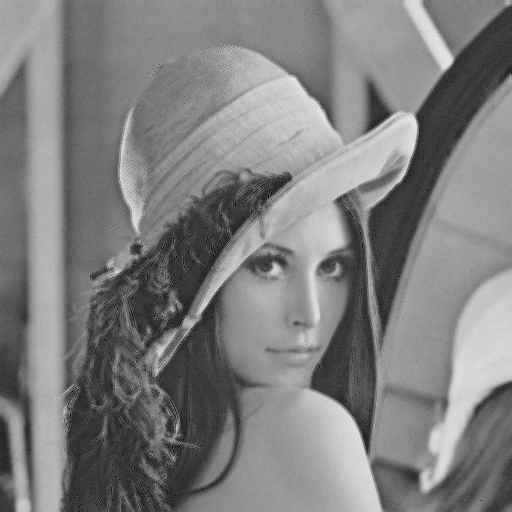

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
Laplacian image with scaling 128


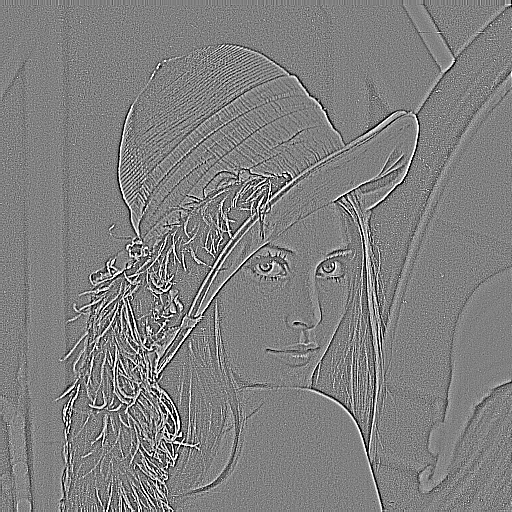

Sharpened image using Laplacian:


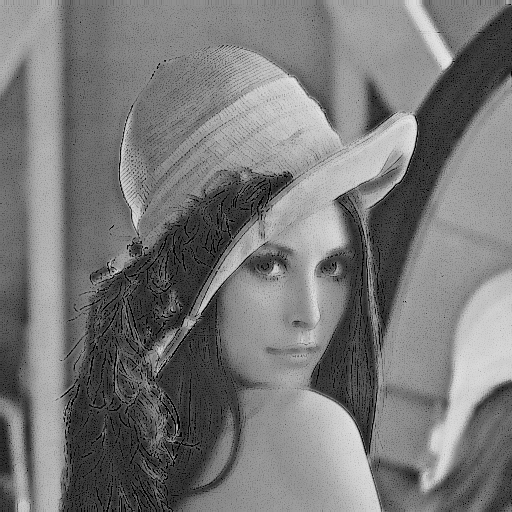

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
Laplacian image with scaling 0


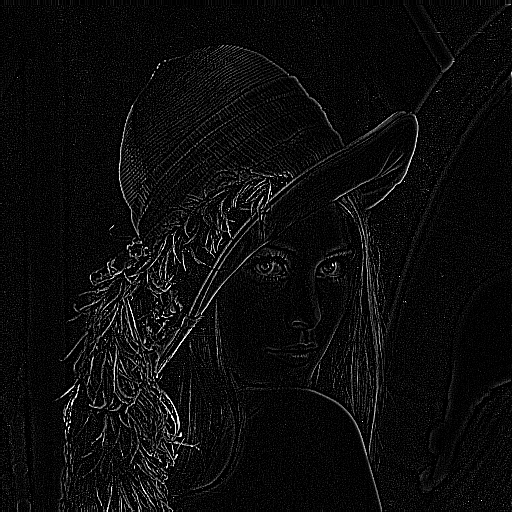

Sharpened image using Laplacian:


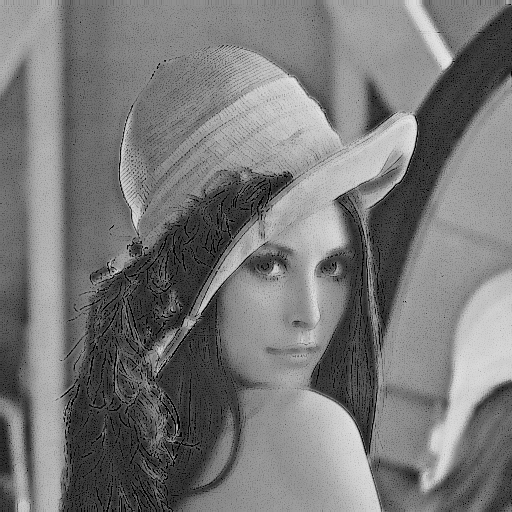

In [30]:
def sharpen_image_laplacian(kernel, scaling=0):
    image = cv2.imread('./sample_data/lenna.png', cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Image doesn't exists")
        return None

    print(kernel)

    float_laplacian = cv2.filter2D(image, ddepth=cv2.CV_32F, kernel=kernel)

    scale_laplacian = float_laplacian + scaling

    laplacian = np.clip(scale_laplacian, 0, 255).astype(np.uint8)

    print("Laplacian image with scaling " + str(scaling))
    cv2_imshow(laplacian)

    laplacian = cv2.filter2D(image, ddepth=-1, kernel=kernel)

    sharpened_image = cv2.subtract(image, laplacian)

    sharpened = np.clip(sharpened_image, 0, 255).astype(np.uint8)

    print("Sharpened image using Laplacian:")
    cv2_imshow(sharpened)

    return

kernalA = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]],
              dtype=np.float32)
kernelB = np.array([[1, 1, 1],
              [1, -8, 1],
              [1, 1, 1]],
              dtype=np.float32)
kernelC = np.array([[0, -1, 0],
              [-1, 4, -1],
              [0, -1, 0]],
              dtype=np.float32)
kernelD = np.array([[-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]],
              dtype=np.float32)

sharpen_image_laplacian(kernalA, 128)
sharpen_image_laplacian(kernalA, 0)
sharpen_image_laplacian(kernelB, 128)
sharpen_image_laplacian(kernelB, 0)
sharpen_image_laplacian(kernelC, 128)
sharpen_image_laplacian(kernelC, 0)
sharpen_image_laplacian(kernelD, 128)
sharpen_image_laplacian(kernelD, 0)

Unsharp Masking image:


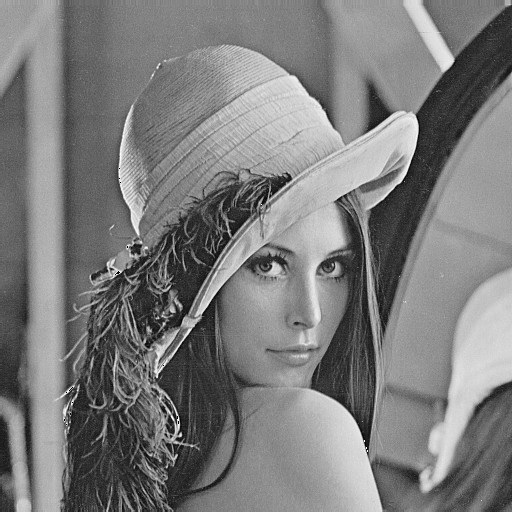

Highboost Filtering image:


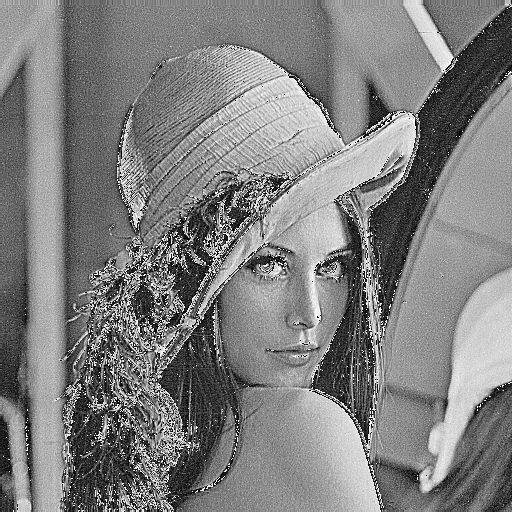

Laplacian egde detection image:


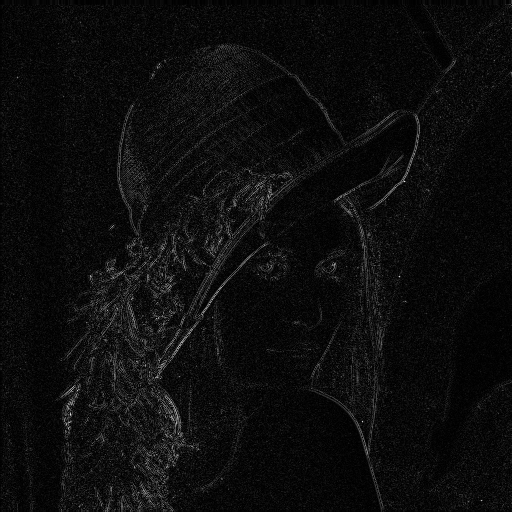

Sobel egde detection image:


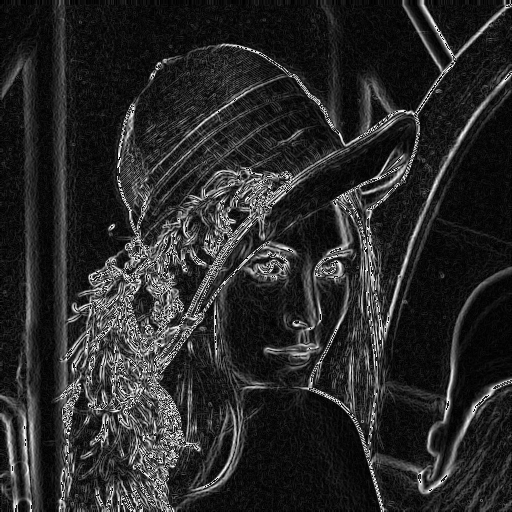

Roberts egde detection image:


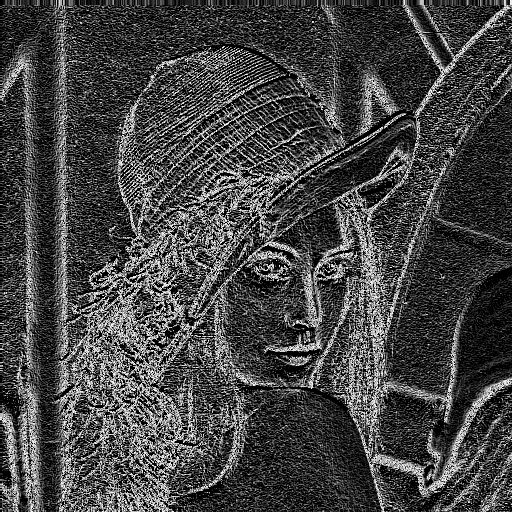

Canny egde detection image:


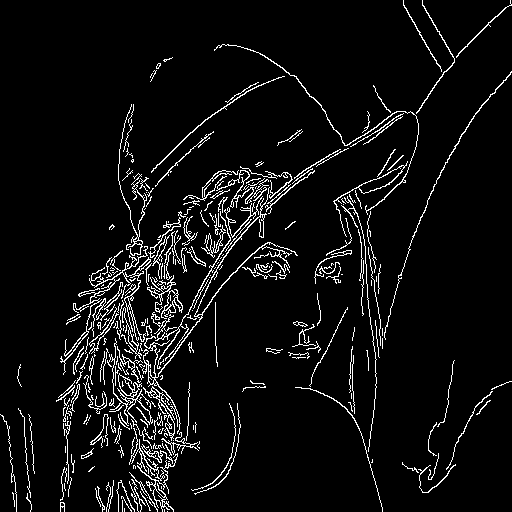

In [41]:
def unsharp_masking(image, k=1.0):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    mask = gray - blurred

    sharp = gray + k * mask

    return np.clip(sharp, 0, 255).astype(np.uint8)

image = cv2.imread("./sample_data/lenna.png")

unsharp_result = unsharp_masking(image, k=1)
print("Unsharp Masking image:")
cv2_imshow(unsharp_result)
print("Highboost Filtering image:")
highboost_result = unsharp_masking(image, k=5)
cv2_imshow(highboost_result)

def edge_detection(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.uint8(np.sqrt(sobelx**2 + sobely**2))

    roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    roberts_x_result = cv2.filter2D(gray, -1, roberts_x)
    roberts_y_result = cv2.filter2D(gray, -1, roberts_y)
    roberts = np.sqrt(roberts_x_result**2 + roberts_y_result**2)
    roberts = np.uint8(255 * (roberts / np.max(roberts)))

    canny = cv2.Canny(gray, 100, 200)

    return laplacian, sobel, roberts, canny

laplacian_result, sobel_result, roberts_result, canny_result = edge_detection(image)

print("Laplacian egde detection image:")
cv2_imshow(laplacian_result)
print("Sobel egde detection image:")
cv2_imshow(sobel_result)
print("Roberts egde detection image:")
cv2_imshow(roberts_result)
print("Canny egde detection image:")
cv2_imshow(canny_result)